## **<center><h1>AIRLINE PASSANGERS SATISFACTION</h1></center>**
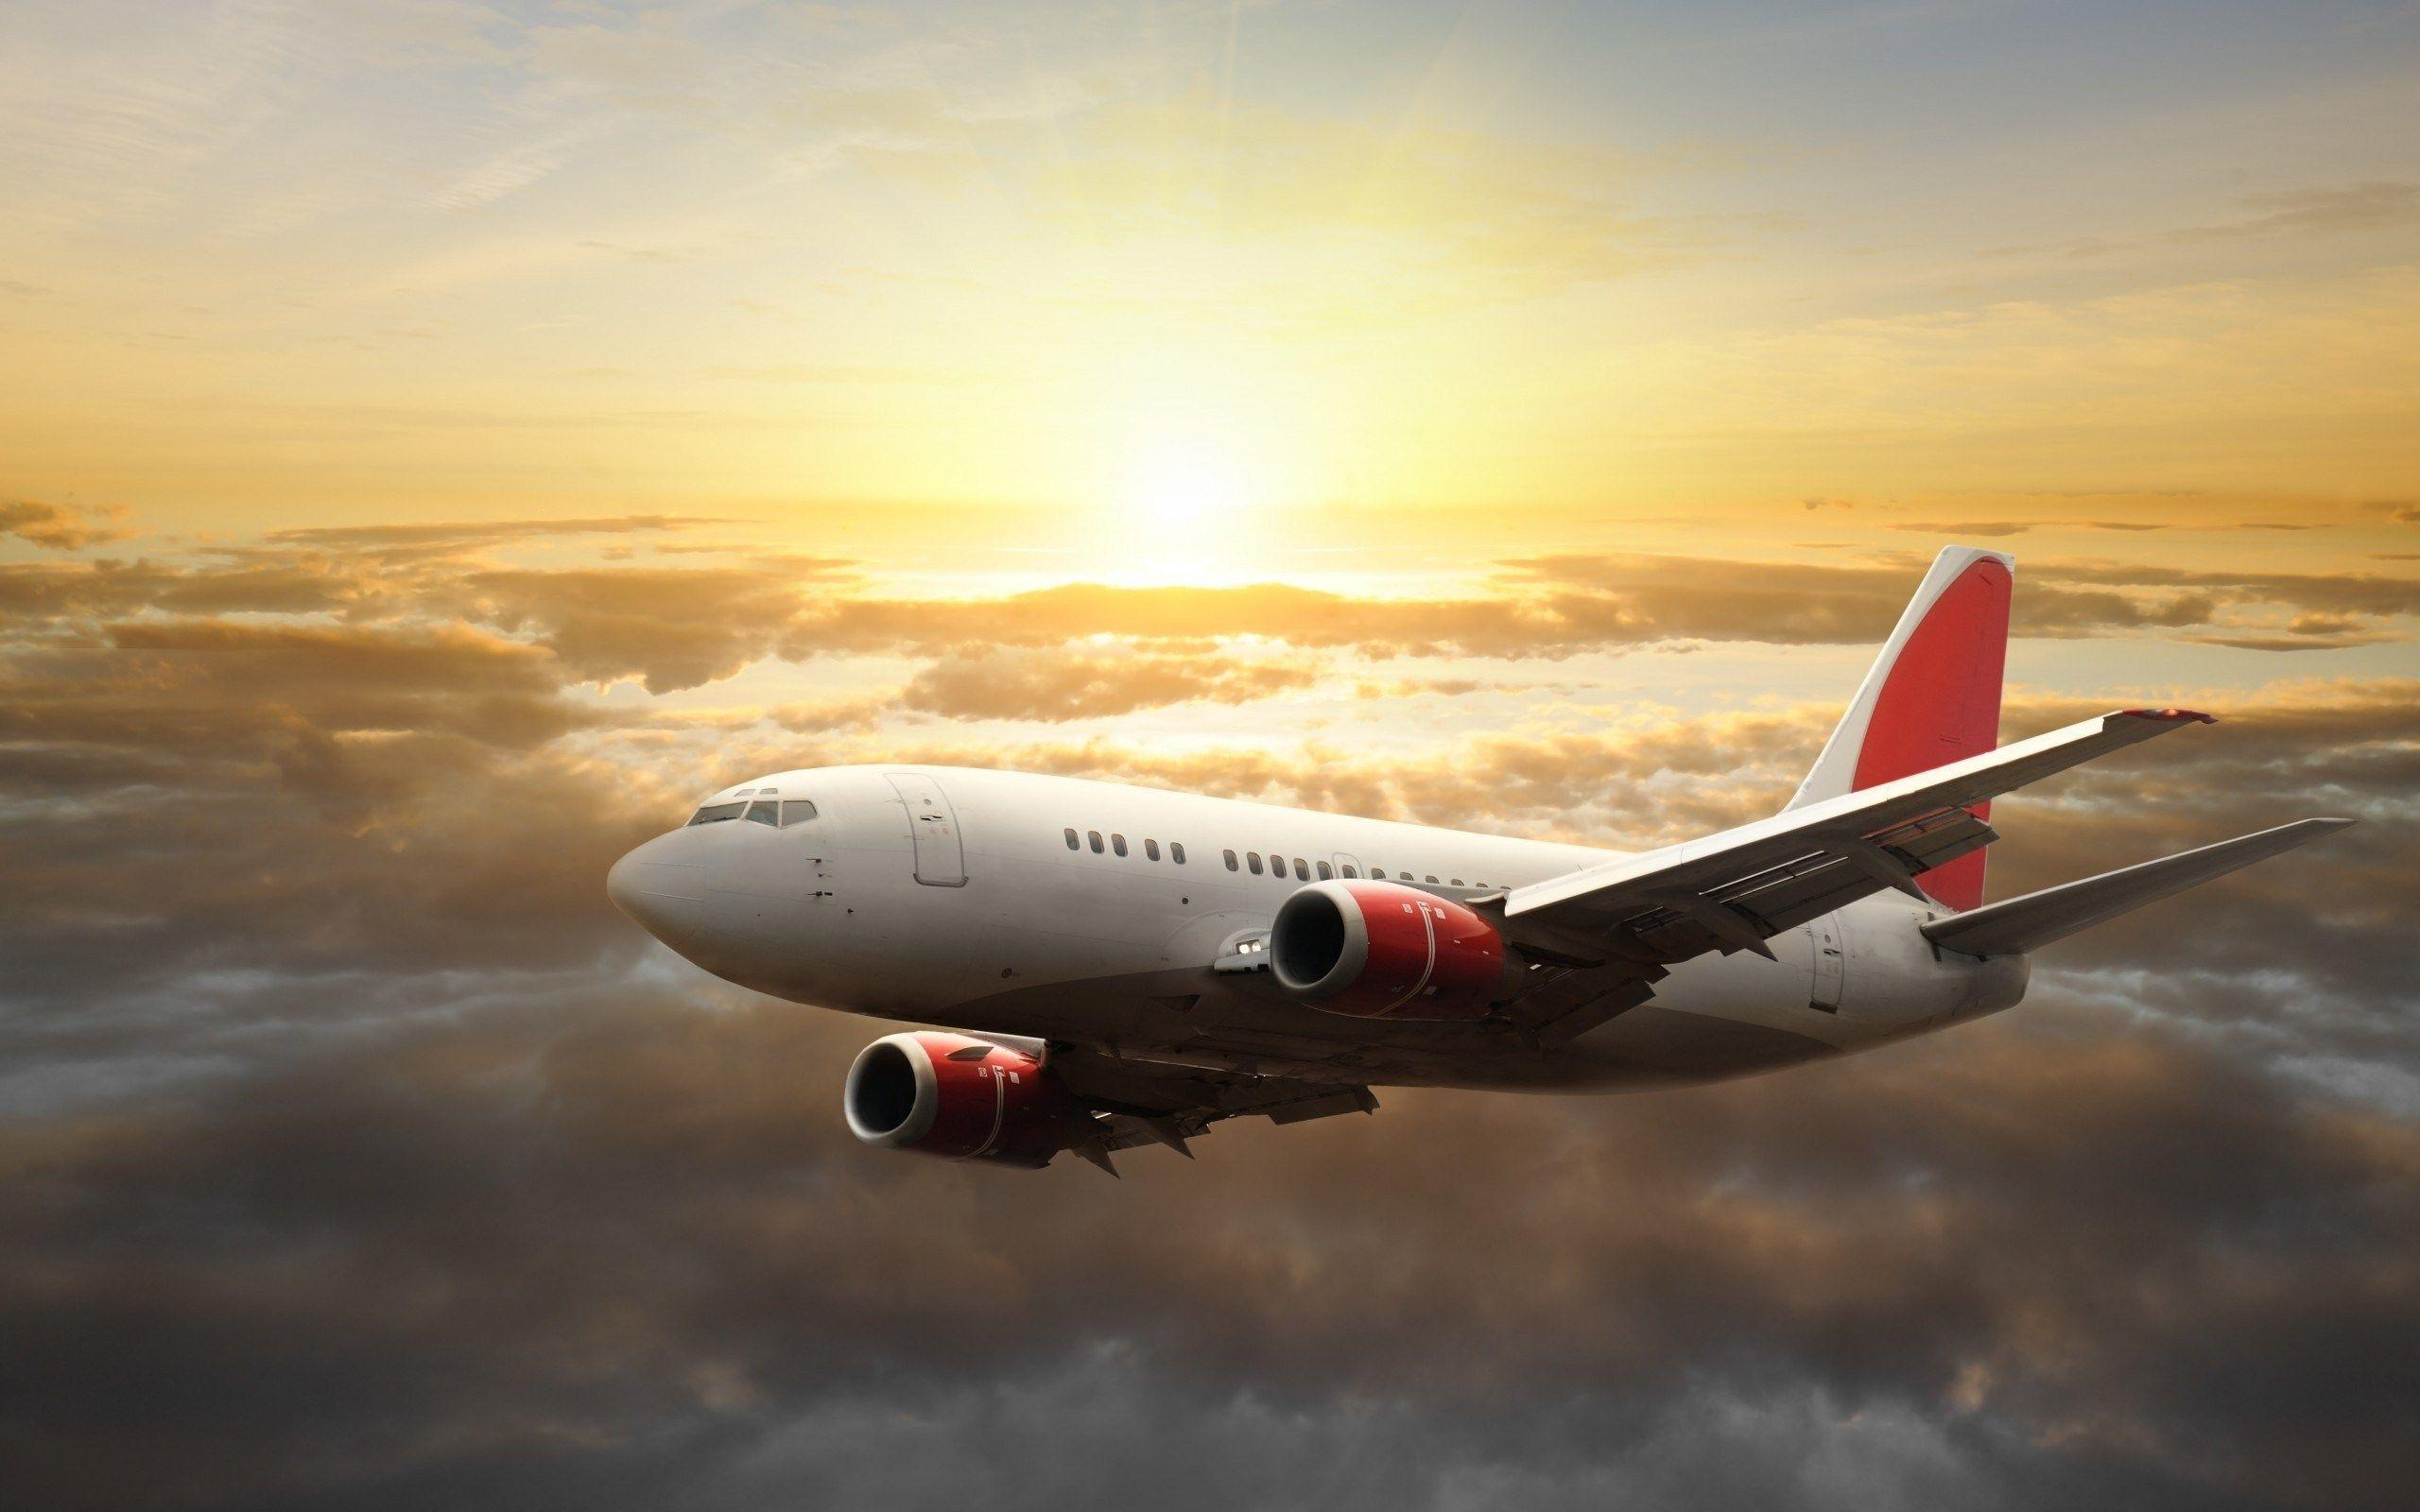
<center>By Muttyara Kintan<center> 

# BUSINESS PROBLEM & DATA UNDERSTANDING

## Context

Sebuah perusahaan maskapai penerbangan, ingin mengetahui faktor-faktor apa saja yang dapat mempengaruhi kepuasan dalam pelayanan maskapai penerbangan. Informasi ini akan membantu perusahaan untuk melakukan penelitian lebih lanjut tentang **survei kepuasan pelanggan terhadap pelayanan maskapai penerbangan**. Hasil dari analisis yang dilakukan dapat menjadi sebuah  kesimpulan dalam membuat keputusan, langkah apa yang perlu dilakukan bagi maskapai penerbangan untuk dapat meningkatkan kepuasan pelayanan untuk konsumen.

## Problem Statement

Berdasarkan latar belakang yang telah dijabarkan, maka perumusan masalah dapat kita jabarkan sebagai berikut :
1. Apakah penumpang merasa puas dengan pelayanan yang diberikan oleh maskapai penerbangan?
2. Bagaimana cara meningkatkan kualitas pelayanan maskapai penerbangan?

## Data Understanding
Untuk menjawab pertanyaan diatas, maka kita dapat melakukan analisa data **Airline Passanger Satisfaction** hasil dari survei yang sudah dilakukan oleh perusahaan maskapai penerbangan.   

Dataset dapat di akses [disini](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction).

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| ID | Integer | Unique passangers number |
| Gender | Object | Gender of the passengers (Female, Male) |
| Customer Type | Object | The customer type (Loyal customer, disloyal customer) |
| Age | Integer | The actual age of the passengers |
| Type of Travel | Object | Purpose of the flight of the passengers (Personal Travel, Business Travel) |
| Class | Object | Travel class in the plane of the passengers (Business, Eco, Eco Plus) |
| Flight Distance | Integer | The flight distance of this journey |
| Inflight wifi service | Integer | Satisfaction level of the inflight wifi service (0:Not Applicable:1-5) |
| Departure/Arrival time convenient | Integer | Satisfaction level of Departure/Arrival time convenient |
| Inflight entertainment | Integer  | Satisfaction level of inflight entertainment |
| On-board service | Integer | Satisfaction level of On-board service |
| Leg room service | Integer | Satisfaction level of Leg room service |
| Baggage handling | Integer | Satisfaction level of baggage handling |
| Checking service | Integer | Satisfaction level of Check-in service |
| Inflight service | Integer | Satisfaction level of inflight service |
| Cleanliness | Integer | Satisfaction level of Cleanliness |
| Departure Delay in Minutes | Integer | Minutes delayed when departure |
| Arrival Delay in Minutes | Float | Minutes delayed when Arrival |
| Satisfaction | Object | Airline satisfaction level(Satisfaction, neutral or dissatisfaction) |

<br>

# IMPORT LIBRARY & LOAD DATASET

Untuk melakukan persiapan data, kita perlu melakukan import library yang dibutuhkan dan menyiapkan dataset yang ingin kita lakukan analisa.

In [1]:
# Basic Library
import numpy as np
import pandas as pd
import seaborn as sns

# Visualization
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

# Import Warnings
import warnings
warnings.filterwarnings("ignore")

Selanjutnya kita perlu melakukan import dataset yang ingin akan kita analisa. Berikut adalah dataset dari **Airline Passanger Satisfaction**.

In [2]:
df = pd.read_csv('airline passanger satisfaction.csv')
df

Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0                0   70172    Male     Loyal Customer   13  Personal Travel   
1                1    5047    Male  disloyal Customer   25  Business travel   
2                2  110028  Female     Loyal Customer   26  Business travel   
3                3   24026  Female     Loyal Customer   25  Business travel   
4                4  119299    Male     Loyal Customer   61  Business travel   
...            ...     ...     ...                ...  ...              ...   
103899      103899   94171  Female  disloyal Customer   23  Business travel   
103900      103900   73097    Male     Loyal Customer   49  Business travel   
103901      103901   68825    Male  disloyal Customer   30  Business travel   
103902      103902   54173  Female  disloyal Customer   22  Business travel   
103903      103903   62567    Male     Loyal Customer   27  Business travel   

           Class  Flight Distance  Inflight wifi service  \
0       Eco Plus              460                      3   
1       Business              235                      3   
2       Business             1142                      2   
3       Business              562                      2   
4       Business              214                      3   
...          ...              ...                    ...   
103899       Eco              192                      2   
103900  Business             2347                      4   
103901  Business             1995                      1   
103902       Eco             1000                      1   
103903  Business             1723                      1   

        Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                       4  ...                       5   
1                                       2  ...                       1   
2                                       2  ...                       5   
3                                       5  ...                       2   
4                                       3  ...                       3   
...                                   ...  ...                     ...   
103899                                  1  ...                       2   
103900                                  4  ...                       5   
103901                                  1  ...                       4   
103902                                  1  ...                       1   
103903                                  3  ...                       1   

        On-board service  Leg room service  Baggage handling  Checkin service  \
0                      4                 3                 4                4   
1                      1                 5                 3                1   
2                      4                 3                 4                4   
3                      2                 5                 3                1   
4                      3                 4                 4                3   
...                  ...               ...               ...              ...   
103899                 3                 1                 4                2   
103900                 5                 5                 5                5   
103901                 3                 2                 4                5   
103902                 4                 5                 1                5   
103903                 1                 1                 4                4   

        Inflight service  Cleanliness  Departure Delay in Minutes  \
0                      5            5                          25   
1                      4            1                           1   
2                      4            5                           0   
3                      4            2                          11   
4                      3            3                           0   
...                  ...          ...                         

# EXPLANATORY DATA ANALYSIS
Pada tahapan ini, kita perlu mengenal dataset yang akan kita analisa. Di proses ini, kita perlu mengetahui apakah ada missing value atau apakah ditemukan data anomali pada dataset tersebut. Apabila ditemukan anomali, maka perlu dilakukan data cleaning dan di justifikasi langkah yang diambil, baik secara domain knowledge maupun secara statistik.

## Data Format

In [3]:
print('Pada data frame terdapat', df.shape[0],'baris dan', df.shape[1],'kolom.')

Pada data frame terdapat 103904 baris dan 25 kolom.


Pada dataset **Airline Passangers Satisfaction** terdapat 103.904 baris dan 25 kolom. Dimana setiap baris data merepresentasikan informasi terkait kepuasan pelanggan terhadap maskapai penerbangan.

In [4]:
df = df.drop(columns=['Unnamed: 0']) 

Pada kolom `Unnamed: 0` dihapus dengan cara melakukan drop baris, karena informasi yang diberikan tidak relevan dalam melalukan proses tahapan analisis selanjutnya.

In [5]:
df = df.rename(columns={'id':'ID','satisfaction':'Satisfaction'})

Pada kolom `id` dan `satisfaction` dilakukan perubahan nama pada huruf kapital, agar seragam dengan variabel lainnya.

In [6]:
display(df.head(),df.tail())

ID  Gender      Customer Type  Age   Type of Travel     Class  \
0   70172    Male     Loyal Customer   13  Personal Travel  Eco Plus   
1    5047    Male  disloyal Customer   25  Business travel  Business   
2  110028  Female     Loyal Customer   26  Business travel  Business   
3   24026  Female     Loyal Customer   25  Business travel  Business   
4  119299    Male     Loyal Customer   61  Business travel  Business   

   Flight Distance  Inflight wifi service  Departure/Arrival time convenient  \
0              460                      3                                  4   
1              235                      3                                  2   
2             1142                      2                                  2   
3              562                      2                                  5   
4              214                      3                                  3   

   Ease of Online booking  ...  Inflight entertainment  On-board service  \
0                       3  ...                       5                 4   
1                       3  ...                       1                 1   
2                       2  ...                       5                 4   
3                       5  ...                       2                 2   
4                       3  ...                       3                 3   

   Leg room service  Baggage handling  Checkin service  Inflight service  \
0                 3                 4                4                 5   
1                 5                 3                1                 4   
2                 3                 4                4                 4   
3                 5                 3                1                 4   
4                 4                 4                3                 3   

   Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  \
0            5                          25                      18.0   
1            1                           1                       6.0   
2            5                           0                       0.0   
3            2                          11                       9.0   
4            3                           0                       0.0   

              Satisfaction  
0  neutral or dissatisfied  
1  neutral or dissatisfied  
2                satisfied  
3  neutral or dissatisfied  
4                satisfied  

[5 rows x 24 columns]

ID  Gender      Customer Type  Age   Type of Travel     Class  \
103899  94171  Female  disloyal Customer   23  Business travel       Eco   
103900  73097    Male     Loyal Customer   49  Business travel  Business   
103901  68825    Male  disloyal Customer   30  Business travel  Business   
103902  54173  Female  disloyal Customer   22  Business travel       Eco   
103903  62567    Male     Loyal Customer   27  Business travel  Business   

        Flight Distance  Inflight wifi service  \
103899              192                      2   
103900             2347                      4   
103901             1995                      1   
103902             1000                      1   
103903             1723                      1   

        Departure/Arrival time convenient  Ease of Online booking  ...  \
103899                                  1                       2  ...   
103900                                  4                       4  ...   
103901                                  1                       1  ...   
103902                                  1                       1  ...   
103903                                  3                       3  ...   

        Inflight entertainment  On-board service  Leg room service  \
103899                       2                 3                 1   
103900                       5                 5                 5   
103901                       4                 3                 2   
103902                       1                 4                 5   
103903                       1                 1                 1   

        Baggage handling  Checkin service  Inflight service  Cleanliness  \
103899                 4                2                 3            2   
103900                 5                5                 5            4   
103901                 4                5                 5            4   
103902                 1                5                 4            1   
103903                 4                4                 3            1   

        Departure Delay in Minutes  Arrival Delay in Minutes  \
103899                           3                       0.0   
103900                           0                       0.0   
103901                           7                      14.0   
103902                           0                       0.0   
103903                           0                       0.0   

                   Satisfaction  
103899  neutral or dissatisfied  
103900                satisfied  
103901  neutral or dissatisfied  
103902  neutral or dissatisfied  
103903  neutral or dissatisfied  

[5 rows x 24 columns]

## Data Duplikat

In [7]:
df.duplicated().sum()

0

Pada dataset ini kita tidak menemukan adanya data duplikat pada data penumpang maskapai. Hal ini perlu dilakukan untuk memastikan bahwa semua penumpang telah mengisi survei sebanyak 1 kali pada setiap akun, guna menghindari kesalahan pada hasil kesimpulan dalam analisa.

## Missing Value

In [10]:
df.isna().sum()

ID                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
Satisfaction                           0
dtype: int64

**Missing value** adalah nilai yang tidak terdeteksi pada dataset. Bisa berupa blank cell atau simbol tertentu seperti NaN (Not a Number) atau NA (Not Available). Missing value perlu diatasi karena dapat menjadi masalah dalam melakukan analisis data, sehingga dapat mempengaruhi hasil analisis.  

**Dari hasil diatas terdapat missing value pada kolom `Arrival Delay in Minutes`**, maka dari itu perlu kita lakukan fillna pada kolom tersebut dengan median dari variable itu sendiri.

In [11]:
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Departure Delay in Minutes'].median())

In [12]:
df.isna().sum()

ID                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
Satisfaction                         0
dtype: int64

Setelah dilakukan handling missing value, data yang hilang atau NaN sudah memiliki nilai dari median variabel itu sendiri.

## Data Tipe

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   ID                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [13]:
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].astype(int)

Mengubah data tipe pada kolom `Arrival Delay in Minutes` dari float menjadi integer.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   ID                                 103904 non-null  int64 
 1   Gender                             103904 non-null  object
 2   Customer Type                      103904 non-null  object
 3   Age                                103904 non-null  int64 
 4   Type of Travel                     103904 non-null  object
 5   Class                              103904 non-null  object
 6   Flight Distance                    103904 non-null  int64 
 7   Inflight wifi service              103904 non-null  int64 
 8   Departure/Arrival time convenient  103904 non-null  int64 
 9   Ease of Online booking             103904 non-null  int64 
 10  Gate location                      103904 non-null  int64 
 11  Food and drink                     103904 non-null  

## Data Unik

Pada tahap ini, dataset yang kita punya sudah bersih dari missing value dan data anomali.

In [15]:
tipe = []
jumlah = []
sample = []
kosong = []
maksimal = []

for i in df.columns :
    sample.append(df[i].unique()[:8])
    jumlah.append(df[i].nunique())
    tipe.append(df[i].dtype)
    kosong.append(df[i].isna().sum())
    maksimal.append(df[i].max())

pd.DataFrame({'dataFeatures':df.columns,
              'dataType':tipe,
              'Nunique':jumlah,
              'Unique':sample,
              'NaN':kosong,
              'Max':maksimal
             })

dataFeatures dataType  Nunique  \
0                                  ID    int64   103904   
1                              Gender   object        2   
2                       Customer Type   object        2   
3                                 Age    int64       75   
4                      Type of Travel   object        2   
5                               Class   object        3   
6                     Flight Distance    int64     3802   
7               Inflight wifi service    int64        6   
8   Departure/Arrival time convenient    int64        6   
9              Ease of Online booking    int64        6   
10                      Gate location    int64        6   
11                     Food and drink    int64        6   
12                    Online boarding    int64        6   
13                       Seat comfort    int64        6   
14             Inflight entertainment    int64        6   
15                   On-board service    int64        6   
16                   Leg room service    int64        6   
17                   Baggage handling    int64        5   
18                    Checkin service    int64        6   
19                   Inflight service    int64        6   
20                        Cleanliness    int64        6   
21         Departure Delay in Minutes    int64      446   
22           Arrival Delay in Minutes    int32      455   
23                       Satisfaction   object        2   

                                               Unique  NaN                Max  
0   [70172, 5047, 110028, 24026, 119299, 111157, 8...    0             129880  
1                                      [Male, Female]    0               Male  
2                 [Loyal Customer, disloyal Customer]    0  disloyal Customer  
3                    [13, 25, 26, 61, 47, 52, 41, 20]    0                 85  
4                  [Personal Travel, Business travel]    0    Personal Travel  
5                           [Eco Plus, Business, Eco]    0           Eco Plus  
6        [460, 235, 1142, 562, 214, 1180, 1276, 2035]    0               4983  
7                                  [3, 2, 4, 1, 5, 0]    0                  5  
8                                  [4, 2, 5, 3, 1, 0]    0                  5  
9                                  [3, 2, 5, 4, 1, 0]    0                  5  
10                                 [1, 3, 2, 5, 4, 0]    0                  5  
11                                 [5, 1, 2, 4, 3, 0]    0                  5  
12                                 [3, 5, 2, 1, 4, 0]    0                  5  
13                                 [5, 1, 2, 3, 4, 0]    0                  5  
14                                 [5, 1, 2, 3, 4, 0]    0                  5  
15                                 [4, 1, 2, 3, 5, 0]    0                  5  
16                                 [3, 5, 4, 2, 1, 0]    0                  5  
17                                    [4, 3, 5, 1, 2]    0                  5  
18                                 [4, 1, 3, 5, 2, 0]    0                  5  
19                                 [5, 4, 3, 1, 2, 0]    0                  5  
20                                 [5, 1, 2, 3, 4, 0]    0                  5  
21                       [25, 1, 0, 11, 9, 4, 28, 43]    0               1592  
22                       [18, 6, 0, 9, 23, 8, 35, 51]    0               1584  
23               [neutral or dissatisfied, satisfied]    0          satisfied

Dari proses pengenalan dan pembersihan data, dapat disimpulkan bahwa :  
* Dataset **Airline Passanger Satisfaction** terdapat 103.904 baris dan 25 kolom.
* Terdapat missing value pada `Arrival Delay in Minutes` sebanyak 310 data, namun dapat diatasi dengan mengisi pada data yang hilang dengan median dari variabel itu sendiri.
* Untuk data duplikat, tidak ditemukan data yang sama(duplikat) pada data penumpang maskapai penerbangan.
* Untuk data unik, dapat disimpulkan bahwa tidak ada duplikat ID/data. Kolom `Unnamed : 0` dan `id` dihapus karena tidak relevan untuk analisa.
* Selain itu, tidak ditemukan data dengan format penulisan yang salah. 
* Untuk nilai *rating* yang telah ditetapkan memiliki skala dari 1 yang artinya buruk hingga skala 5 yang artinya sangat baik. Namum dapat dilihat bahwa beberapa kategori memiliki nilai 0, dimana nilai 0 tidak termasuk range rating sehingga diasumsikan responden tidak mengisi kolom. 
* Khusus untuk `Baggage_Handling` tidak terdapat nilai 0, sehingga diketahui bahwa penanganan bagasi merupakan salah satu hal yang paling diperhatikan.
* Pada kolom `Satisfaction` penumpang yang memberi survey dengan kategori *neutral or dissatisfied* dapat digabung menjadi satu kategori. Namun untuk analisa survey selanjutnya disarankan untuk kategori *neutral or dissatisfied* dapat dipisah karena bisa menghasilkan bias pada analisa.
* Tidak ditemukan harga tiket, tanggal keberangkatan ataupun lokasi keberangkatan pada dataset ini yang dapat kita analisa dan dapat menjadi faktor kepuasan pelanggan.

In [16]:
df.to_csv('Airline_Passangers_Satisfaction.csv')

Setelah melakukan handling pada missing value, dataset dapat kita simpan dengan format `csv`.

## Correlation

Kita akan melihat hubungan antara variabel dari dataset.

In [19]:
corr = df.corr(method='spearman')
corr

ID       Age  Flight Distance  \
ID                                 1.000000  0.025727         0.133474   
Age                                0.025727  1.000000         0.072321   
Flight Distance                    0.133474  0.072321         1.000000   
Inflight wifi service             -0.022580  0.016518         0.006456   
Departure/Arrival time convenient -0.003084  0.036161        -0.013443   
Ease of Online booking             0.012439  0.022983         0.066114   
Gate location                     -0.001006 -0.002103         0.000750   
Food and drink                    -0.000574  0.020841         0.046593   
Online boarding                    0.055773  0.215725         0.194100   
Seat comfort                       0.054393  0.161383         0.137140   
Inflight entertainment             0.001605  0.081574         0.105091   
On-board service                   0.051869  0.070441         0.099600   
Leg room service                   0.041884  0.051864         0.118062   
Baggage handling                   0.070436 -0.026338         0.060355   
Checkin service                    0.074618  0.039724         0.071707   
Inflight service                   0.074150 -0.031062         0.059940   
Cleanliness                        0.022706  0.053716         0.080697   
Departure Delay in Minutes         0.056776 -0.010894         0.026570   
Arrival Delay in Minutes          -0.004436 -0.012384        -0.001704   

                                   Inflight wifi service  \
ID                                             -0.022580   
Age                                             0.016518   
Flight Distance                                 0.006456   
Inflight wifi service                           1.000000   
Departure/Arrival time convenient               0.338860   
Ease of Online booking                          0.711816   
Gate location                                   0.332789   
Food and drink                                  0.132695   
Online boarding                                 0.435733   
Seat comfort                                    0.118909   
Inflight entertainment                          0.199700   
On-board service                                0.116584   
Leg room service                                0.149572   
Baggage handling                                0.113337   
Checkin service                                 0.042710   
Inflight service                                0.105462   
Cleanliness                                     0.130628   
Departure Delay in Minutes                     -0.030202   
Arrival Delay in Minutes                       -0.036828   

                                   Departure/Arrival time convenient  \
ID                                                         -0.003084   
Age                                                         0.036161   
Flight Distance                                            -0.013443   
Inflight wifi service                                       0.338860   
Departure/Arrival time convenient                           1.000000   
Ease of Online booking                                      0.439947   
Gate location                                               0.450214   
Food and drink                                              0.002934   
Online boarding                                             0.061735   
Seat comfort                                                0.011934   
Inflight entertainment                                     -0.009296   
On-board service                                            0.071701   
Leg room service                                            0.007048   
Baggage handling                                            0.088548   
Checkin service                                             0.099762   
Inflight service                                            0.090800   
Cleanliness                                                 0.013951   
Departure Delay in Minutes                                 -0.0

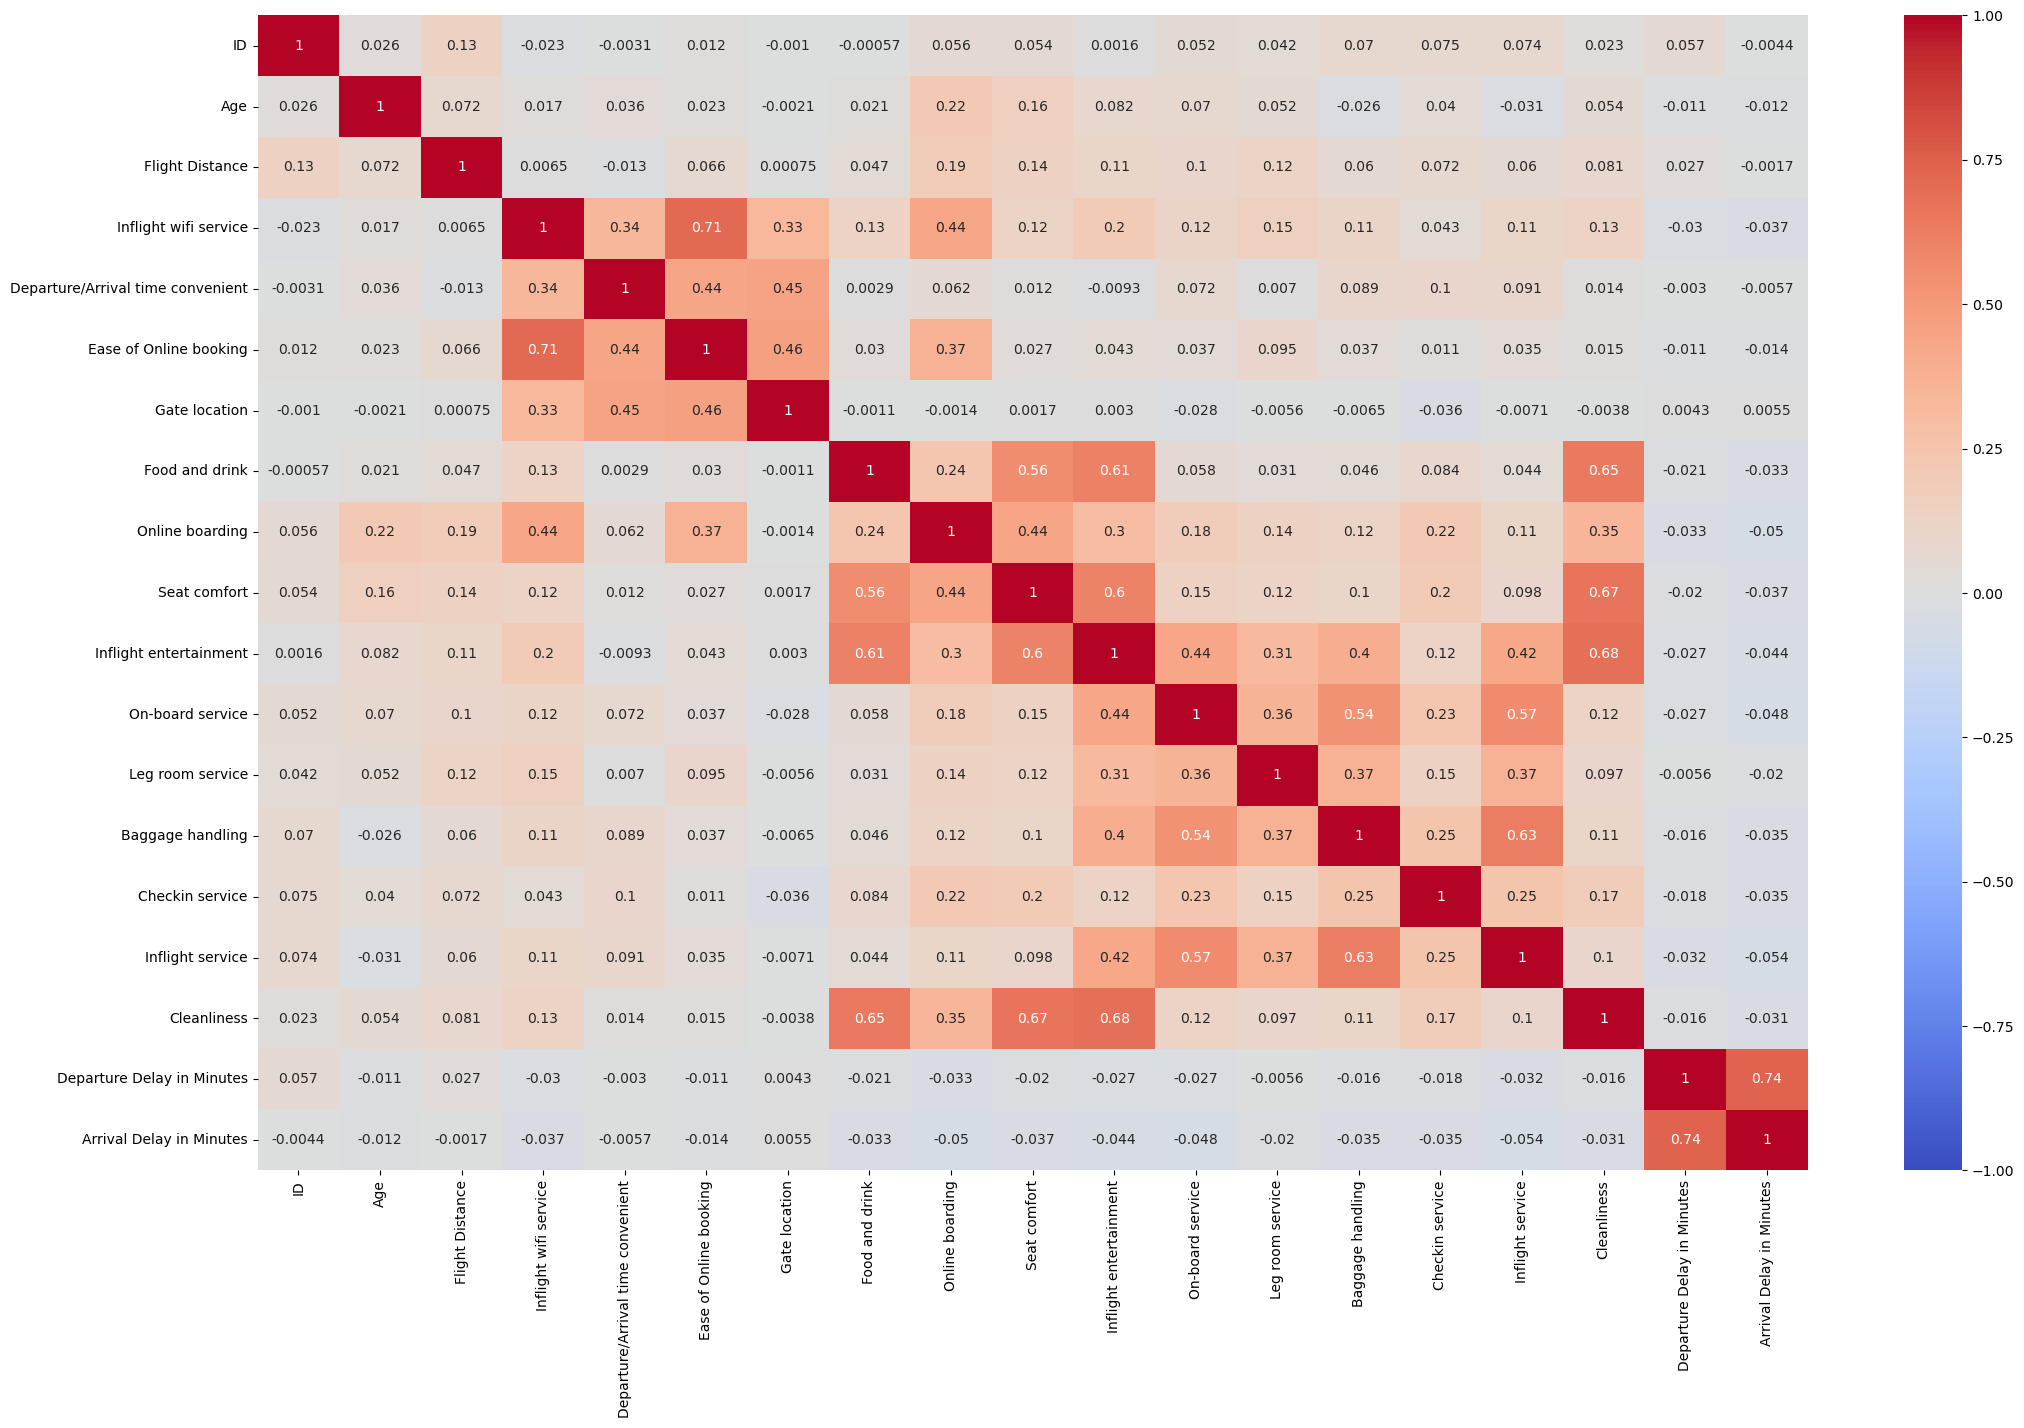

In [22]:
plt.figure(figsize=(25, 15))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, cmap="coolwarm")
plt.show()

Pada diagram diatas menunjukkan bahwa, hubungan antara `Departure Delay in Minutes` dengan `Arrival Delay in Minutes` memiliki hubungan korelasi yang sangat kuat. Dibuktikan dengan nilai korelasi sebesar 0,74. Maka dapat kita asumsikan bahwa, apabila keberangkatan pesawat mengalami keterlambatan maka akan semakin lama kedatangan pesawat ke bandara tujuan selanjutnya.

# DATA ANALYSIS

Setelah melakukan pengenalan data dan pembersihan pada dataset, tahap selanjutnya yaitu analisa data. Pada tahapan ini kita akan melakukan analisa faktor-faktor apa saja yang dapat mempengaruhi kepuasan pelayanan terhadap penumpang maskapai penerbangan dan dapat memberikan rekomendasi apa saja yang dapat dilakukan guna meningkatkan kualitas dalam pelayanan.

## Berdasarkan Kepuasan Penumpang

Maskapai penerbangan telah mengumpulkan survei kepuasan pelayanan terhadap penumpang maskapai penerbangan yang dapat menjadi tolak ukur dalam menentukan seberapa baik pelayanan maskapai penerbangan terhadap penumpang, akankah dapat memenuhi harapan penumpang atau tidak.  

Jika dalam pelayanan maskapai penerbangan dapat memenuhi harapan penumpang maka maskapai tersebut dapat mempertahankan pelayanannya. Namun jika ditemukan feedback bahwa pelayanan maskapai belum memenuhi harapan penumpang, maka perlu dilakukan peningkatan pelayanan  dan melakukan prediksi tentang perkembangan bisnis.

Dari dataset ini, hasil survei tentang kepuasan pelayanan penumpang dibagi menjadi 2 kategori, yaitu `satisfied`, `neutral`, dan `dissatisfied`. Berikut adalah analisa perbandingan kepuasan penumpang maskapai penerbangan.

In [ ]:
df['Satisfaction'].value_counts()

In [ ]:
# Membuat canvas
fig=plt.figure(figsize=(10,6))
plt.suptitle('Passengers Satisfaction', weight='bold',fontsize=24)
grid=gridspec.GridSpec(nrows=1,ncols=2,figure=fig)

# Subplot1 : Bar Chart
ax1=fig.add_subplot(grid[0,0])
sns.countplot(x='Satisfaction', data=df, ax=ax1, palette=['#bfdb38','#fc7300'])

# Remove the border of the plot
for spine in ax1.spines.values():
    spine.set_visible(False)
    
# Dissapera yaxis
ax1.get_yaxis().set_visible(False)

for index, value in enumerate(df['Satisfaction'].value_counts()):
    ax1.annotate(value, xy=(index, value+2000), ha='center', va='center', fontsize=16)

ax1.set_xticklabels(df['Satisfaction'].value_counts().index, fontsize=15)    

# Subplot2 : Pie Chart
ax2=fig.add_subplot(grid[0,1])
label=list(df['Satisfaction'].value_counts().index)
value=list(df['Satisfaction'].value_counts().values)
ax2.pie(value, labels=label, autopct='%1.1f%%', explode=(0,0.1), startangle=140, colors=['#bfdb38','#fc7300'])
ax2.axis('equal')

plt.show()

Dibuktikan pada grafik diatas, perbandingan hasil survey antara penumpang maskapai Tiara Airlines yang merasa `satistied` sebanyak 45.025 penumpang dan penumpang maskapai Tiara Airlines yang merasa `neutral or dissatisfied` sebanyak 58.879 penumpang.

Dapat kita simpulkan bahwa sebanyak **58.879 atau 56,7%** penumpang merasa **netral atau bahkan tidak puas** dengan pelayanan yang diberikan oleh maskapai Tiara Airlines. Pihak internal maskapai penerbangan perlu melakukan penelitian lebih lanjut tentang hal ini, karena dapat mempengaruhi personal branding perusahaan yang kurang baik.

## Berdasarkan Profil Penumpang

In [ ]:
display(pd.crosstab(df['Gender'],df['Satisfaction'],normalize='index'), pd.crosstab(df['Class'],df['Satisfaction'],normalize='index'), pd.crosstab(df['Customer Type'],df['Satisfaction'],normalize='index'), pd.crosstab(df['Type of Travel'],df['Satisfaction'],normalize='index'))

In [ ]:
# Membuat canvas
fig=plt.figure(figsize=(10,10))
plt.suptitle('Passangers Profile', weight='bold',fontsize=24)
grid=gridspec.GridSpec(nrows=2,ncols=2,figure=fig)

## Subplot : Gender
ax1=fig.add_subplot(grid[0,0])
ax1.set_title('Gender', weight='bold')

label=list(df['Gender'].value_counts().index)
value=list(df['Gender'].value_counts().values)

# Pie Chart
ax1.pie(value, labels=label, autopct='%1.1f%%', explode=(0,0.1), startangle=140, colors=['#db6b97','#5584ac'])
ax1.axis('equal')

## Subplot : Customer Type
ax2=fig.add_subplot(grid[1,0])
ax2.set_title('Customer Type', weight='bold')

label=list(df['Customer Type'].value_counts().index)
value=list(df['Customer Type'].value_counts().values)

# Pie Chart
ax2.pie(value, labels=label, autopct='%1.1f%%', explode=(0,0.1), startangle=140, colors=['#ecb365','#ecdbba'])
ax2.axis('equal')

## Subplot : Class
ax3=fig.add_subplot(grid[0,1])
ax3.set_title('Class', weight='bold')

label=list(df['Class'].value_counts().index)
value=list(df['Class'].value_counts().values)

# Pie Chart
ax3.pie(value, labels=label, autopct='%1.1f%%', explode=(0.1,0.1,0,), startangle=140, colors=['#f0eccf','#a3bb98','#ebdc87'])
ax3.axis('equal')

## Subplot : Type of Travel
ax4=fig.add_subplot(grid[1,1])
ax4.set_title('Type of Travel', weight='bold')

label=list(df['Type of Travel'].value_counts().index)
value=list(df['Type of Travel'].value_counts().values)

# Pie Chart
ax4.pie(value, labels=label, autopct='%1.1f%%', explode=(0,0.1), startangle=140, colors=['#7393a7','#dbe2ef'])
ax4.axis('equal')

plt.show()

Dari hasil analisa diatas, dapat disimpulkan bahwa :
- Kepuasan pelayanan berdasarkan profil penumpang terhadap `Gender` tidak memiliki perbedaan yang signifikan. Sebanyak 50.7% penumpang *Female* merasa puas dibandingkan dengan penumpang *Male* yang merasa tidak puas dengan pelayanan yang diberikan oleh maskapai penerbangan.


- Kepuasan pelayanan berdasarkan profil penumpang terhadap `Class` memiliki perbedaan yang cenderung signifikan. Perbandingan antara penumpang yang memilih kelas *Business* yaitu sebanyak 47.8% dan penumpang yang memilih kelas *Eco* yaitu sebanyak 45.0%, sedangkan penumpang yang memilih kelas *Eco Plus* hanya sebanyak 7.2%. Hal ini menunjukkan peminat pesawat kelas *Business* dan kelas *Eco* lebih banyak daripada kelas *Eco Plus*.


- Kepuasan pelayanan berdasarkan profil penumpang terhadap `Customer Type` memiliki perbedaan yang cenderung signifikan. Dilihat dari perbandingan diatas, penumpang yang *Loyal Customer* dan *Disloyal Customer* yaitu sebanyak 81.7% dan 18.3%, artinya penumpang yang setia dan selalu menggunakan jasa maskapai penerbangan lebih banyak.


- Kepuasan pelayanan berdasarkan profil penumpang terhadap `Type of Travel` memiliki perbedaan yang signifikan. Dimana 69% penumpang yang menggunakan jasa penerbangan Tiara Airlines merupakan kategori *Business Travel* lebih banyak dibandingkan dengan 31% adalah penumpang dengan kategori *Personal Travel*.

## Berdasarkan Usia Penumpang

In [ ]:
pd.crosstab(df['Age'],df['Satisfaction'],normalize='index').sum()

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Satisfaction Base on Age', weight='bold', fontsize=24)
sns.kdeplot(data=df,x='Age',hue='Satisfaction', palette=['#ac0c0c','#2e5a1c'])

Dari grafik diatas, dapat disimpulkan bahwa distribusi tidak normal. Penumpang yang menjawab puas terhadap pelayanan maskapai berkisaran usia 40-55 tahun. Sedangkan penumpang yang menjawab survei tidak puas terhadap pelayanan maskapai berkisaran usia 20-30 tahun.

## Korelasi Berdasarkan Rating Survey

In [ ]:
df.corr('spearman')

In [ ]:
sns.heatmap(df.corr('spearman'))

Dari heatmap diatas, dapat dibuktikan bahwa ada beberapa variabel yang memiliki korelasi yang cukup tinggi. Hal ini diakibatkan karena penilaian yang saling terkeikatan. Misalnya, orang memilih nilai rendah untuk kemudahan online booking dan memberikan nilai rendah pada wifi dalam penerbangan. Contoh lainnya yaitu penilaian terhadap makanan, minuman dan kebersihan bisa dikatakan cukup.

# Kesimpulan & Rekomendasi
Setelah melakukan analisa diatas kita dapat membuat kesimpulan dan rekomendasi untuk meningkatkan pelayanan **maskapai penerbangan Tiara Airlines**.

### Kesimpulan
Dari hasil analisa secara keseluruhan, dapat kita simpulkan bahwa :
- Hasil analisa dari survey menunjukkan bahwa penumpang memiliki kecenderungan merasa `netral atau tidak puas` terhadap pelayanan yang diberikan oleh maskapai penerbangan, dengan presentase 56.7%
- Dari 103.904 data survey, terdapat 50.7% yang `gender` female merasa puas dengan pelayanan yang diberikan oleh maskapai penerbangan
- Sebanyak 69.4% penumpang memilih kelas `bisnis` cenderung merasa lebih puas dengan pelayanan yang diberikan oleh maskapai penerbangan. Karena semakin jauh waktu tempuh/perjalanan penumpang, maka penumpang akan merasa lebih nyaman dengan fasilitas yang ada pada kelas bisnis.
- Penumpang dengan tujuan `personal travel` cenderung merasa tidak puas dengan pelayanan yang diberikan oleh maskapai penerbangan, dibandingkan dengan penumpang yang bertujuan untuk `bisnis travel`. Hal ini disebabkan karena tujuan personal travel lebih banyak meilih kelas ekonomi, dengan presentase 31%
- Penumpang yang merasa puas dengan pelayanan yang diberikan oleh maskapai memiliki rentang usia antara 40-55 tahun, sedangkan penumpang yang merasa netral atau tidak puasdengan pelayanan yang diberikan oleh maskapai memiliki rentang usia antara 20-30 tahun.

### Rekomendasi
-  Berdasarkan hasil penelitian ini, maka kami menyarankan bahwa hendaknya maskapai penerbangan Tiara Airlines agar memperhatikan harga dan  kualitas pelayanan dalam rangka meningkatkan kepuasan pelanggan. Sehingga jasa yang  ditawarkan  oleh Tiara Airlines akan lebih  kompetitif demi merebut porsi pasar yang lebih besar dalam kategori maskapai berbasis full service bagi Tiara Airlines.


- Untuk mencapai kepuasan pelanggan, tentu pihak Maskapai Tiara Airlines harus lebih meningkatkan kualitas pelayanan kepada konsumen, terutama pada kategori usia  millenial. Pelayanan dan harga yang sesuai dengan pelanggan dalam kategori ini  dirasa  akan lebih  mendorong  pelanggan  ini  menjadi  loyal,  sekaligus menjadi media promosi bagi Tiara Airlines. Dampaknya adalah Tiara Airlines dapat merebut kaum milenial dan pelanggan baru untuk memilih terbang bersama Tiara Airlines dan mempertahankan pelanggan yang lama. Pihak Maskapai Penerbangan Tiara Airlines juga dapat meningkatkan kegiatan pemasaran  lainnya  seperti  promosi  yang  berkelanjutan  melalui  media  sosial  agar  konsumen  lebih mengetahui jasa yang akan diberikan.


Dengan mengetahui faktor apa saja yang dapat mempengaruhi kepuasan penumpang, diharapkan analisa ini dapat membantu hal tersebut dalam meningkatkan kualitas pelayanan Maskapai Tiara Airlines.